<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
df.dropna(subset=['AVG_MATH_4_SCORE','ENROLL','TOTAL_REVENUE','INSTRUCTION_EXPENDITURE','GRADES_4_G'], inplace=True)
print(df)

             PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
408         2000_ALABAMA        ALABAMA  2000   730184.0      4885917.0   
410         2000_ARIZONA        ARIZONA  2000   814807.0      5479168.0   
411        2000_ARKANSAS       ARKANSAS  2000   450751.0      2844855.0   
412      2000_CALIFORNIA     CALIFORNIA  2000  5941946.0     46628207.0   
414     2000_CONNECTICUT    CONNECTICUT  2000   530363.0      5884078.0   
...                  ...            ...   ...        ...            ...   
1219       2015_VIRGINIA       VIRGINIA  2015  1279867.0     15857524.0   
1220     2015_WASHINGTON     WASHINGTON  2015  1072359.0     13709442.0   
1221  2015_WEST_VIRGINIA  WEST_VIRGINIA  2015   279565.0      3478401.0   
1222      2015_WISCONSIN      WISCONSIN  2015   861813.0     11637376.0   
1223        2015_WYOMING        WYOMING  2015    93867.0      1962874.0   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
408          425978.0    

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [5]:
# I would like to create new features for our model.
# The first one is the average amount of expenditure spent on instruction for each student
df['AVG_instruction'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']
# The second new feature is the average student grade at 4th grade
# I think this feature would showcase the effectiveness of primary school education, thus shedding light on 4th grade maths
df['AVG_grade'] = df['GRADES_4_G']/ df['ENROLL']
# Other than these two new features, I would also use Total revenue and year as the other two features

Final feature list: "AVG_instruction", "AVG_change", "Total Revenue", "Year"

Feature selection justification: 
Since we are focusing on the average grade for maths, I think it is most necessary to look at the aerage expenditure on instruction as a primary factor on students' performance.
Also, students' performance at 4th grade mostly depend on whether the state has a good primary school system. This could be shown by seeing the average change in grade per student between KG(kindergarten) and 4th grade
Next, as our data spans from 1992 to 2016, the education system in the U.S. experiences many reforms, which, I assume, is getting increasingly better with regard to education qualities. Thus, I think it would help to include year in my linear relationship.
Lastly, the total revenue from education in a state could also be used to assess how successful education was in that state. So, I would include this feature in my model

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, '4th grade math score over time')

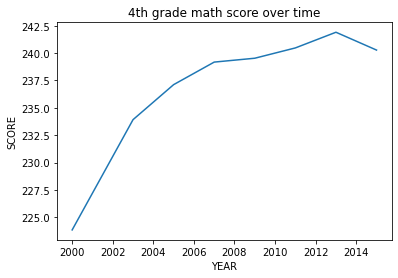

In [6]:
df.groupby('YEAR').AVG_MATH_4_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('4th grade math score over time')

As shown in the graph, we could see an obvious trend that showcases a positive relationship between the increase in Year and student score for 4th grade math.

Visualization 2

Text(0, 0.5, '4th grade math score')

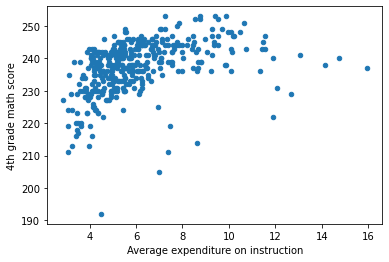

In [111]:
df.plot.scatter(x='AVG_instruction',y='AVG_MATH_4_SCORE')
plt.xlabel('Average expenditure on instruction')
plt.ylabel('4th grade math score')

From the scatterplot above, we could see that there does exist a certain positive relationship between expenditure on instruction and 4th grade math score within the range from $3 to $10 per student. Beyond that range, however, the average math score seems to decrease a little.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [90]:
X = df[['TOTAL_REVENUE','YEAR','AVG_instruction','AVG_grade']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [99]:
# import your sklearn class here
from sklearn.preprocessing import PolynomialFeatures

In [107]:
# create your model here
model = LinearRegression()

In [108]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [109]:
y_pred = model.predict(X_test)
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

-1352.2478965247512
[-5.95278884e-08  8.09630725e-01  7.33059180e-01 -5.15580795e+02]
0.4296458575317069
7.132035135505926


In [60]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'AVG_MATH_4_SCORE')

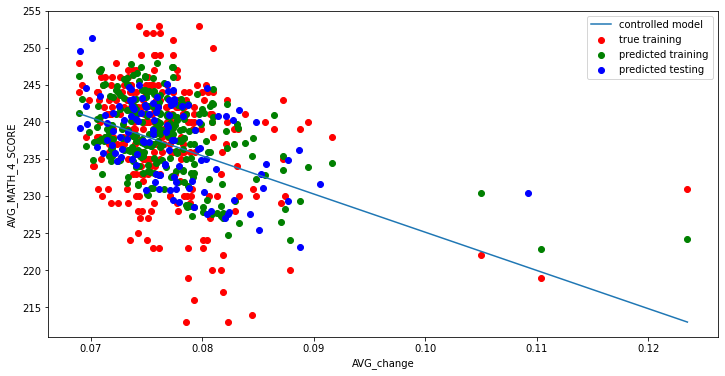

In [88]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_change'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')

<h2> Summary </h2>

   Overall, the model does provide some insight into the possible factors that influence 'AVG_MATH_4_SCORE'. 
    First of all, the model itself has a R^2 value of about 0.43, which is a moderate model fit for a study in education, where observations are not made in strictly controlled settings. The RMSE value of 7.132, although not an ideal average error, is still acceptable, considering the small training sample size due to so many missing values in the csv file.
    Secondly, from the coefficients of our model, we could interpret that on average, for one dollar change in total revenue, there is a change of -5.95278884e-08 change in grade. In other words, for every increase in 20000000 dollars of revenue, there is one point change in average grade for 4th grade math--a very insignificant and unmeaningful coefficient. Therefore, the coefficient we have for total revenue is not practically significant, signifying a lack of clear relationship/dependence between revenue and 4th-grade math score.
    On the other hand, when interpreting other three coefficients, we could see a realistic and meaningful relationship between the features and our target 'AVG_MATH_4_SCORE'. Among these coefficients, we could see a most significant impact from the average 4th grade on our prediction. This clearly makes sense, since the average 4th grade itself incorporates math score and gives a telling story on the state's primary school education quality.
    Despite such moderate model fit, we could still see some problems in this model. From our previous visualizations, we could see that the relationship between our feature and target is not strictly linear. Therefore, perhaps a quadratic model could better capture the actual trend of the data and prevent structural error. In addition, the small training size might also be a crucial problem for the accuracy of the model. Perhaps, in hindsight, better data cleaning and pruning could be used to improve our model.